<a href="https://colab.research.google.com/github/fellmaroua/AIoT-2025/blob/main/TP1_MLforIOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#reading dataset
df= pd.read_csv('/content/smoke_detection_iot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [12]:
#Counts the number of missing values in each column
df.isnull().sum()

,0
Unnamed: 0,0
UTC,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw H2,0
Raw Ethanol,0
Pressure[hPa],0
PM1.0,0


In [14]:
#Define the inputs and the target
X=df.drop('Fire Alarm',axis=1)
y=df['Fire Alarm']

In [15]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [16]:
#Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Logistic Regression Model

In [17]:
#Training the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
#Making prediction
y_pred = model.predict(X_test)

In [20]:
#Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9878652403001756
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3594
           1       0.99      0.99      0.99      8932

    accuracy                           0.99     12526
   macro avg       0.98      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



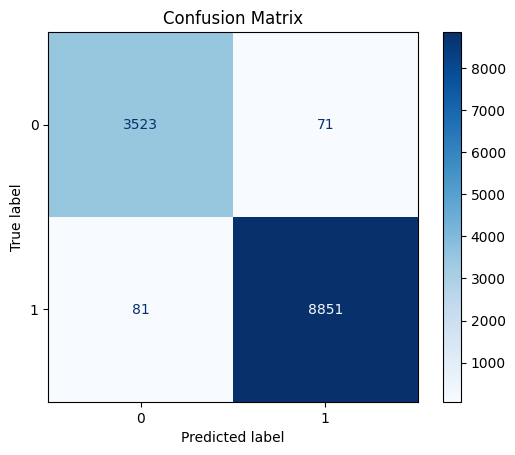

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


##XGBOOST Model

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report


In [25]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:39:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred_xgb = xgb_model.predict(X_test)

In [31]:
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.9999201660546064
Precision: 1.0
Recall: 0.9998880429914913
F1 Score: 0.9999440183619772


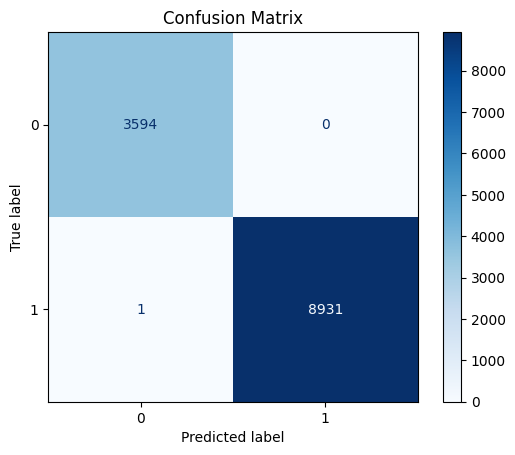

In [32]:
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

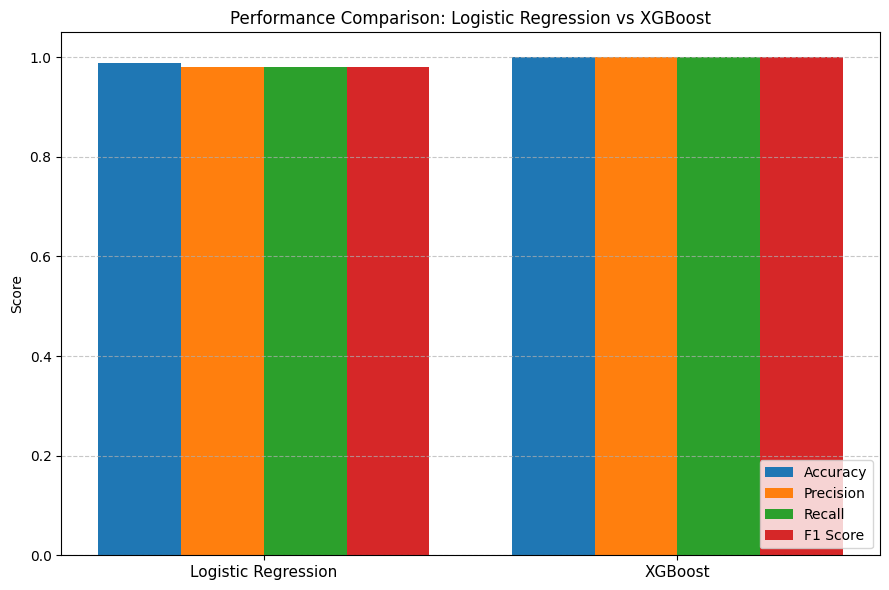

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for Logistic Regression
lr_accuracy = 0.9878652403001756
lr_precision = 0.98
lr_recall = 0.98
lr_f1 = 0.98

# Performance metrics for XGBoost
xgb_accuracy = 0.9999201660546064
xgb_precision = 1.0
xgb_recall = 0.9998880429914913
xgb_f1 = 0.9999440183619772


models = ['Logistic Regression', 'XGBoost']
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(9,6))

plt.bar(x - 1.5*width, [lr_accuracy, xgb_accuracy],  width, label='Accuracy')
plt.bar(x - 0.5*width, [lr_precision, xgb_precision], width, label='Precision')
plt.bar(x + 0.5*width, [lr_recall, xgb_recall],    width, label='Recall')
plt.bar(x + 1.5*width, [lr_f1, xgb_f1],        width, label='F1 Score')

plt.ylabel('Score')
plt.title('Performance Comparison: Logistic Regression vs XGBoost')
plt.xticks(x, models, fontsize=11)
plt.ylim(0, 1.05) # Adjusted y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()